In [1]:
#importing our libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")

In [2]:
train=pd.read_csv("train_u6lujuX_CVtuZ9i (1).csv")
test=pd.read_csv("test_Y3wMUE5_7gLdaTN (1).csv")


In [3]:
#Dataset
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
#features given from dataset
train.columns   

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# Exploratory data analysis
Dataset given to us has the information of users about their Loan_Status with 12 features.

In [5]:
print('Loan_Status   - gives us the number of accepted ones' )  
print(train['Loan_Status'].value_counts())
print('Gender   - classying the gender')
print(train['Gender'].value_counts())
print('Dependents -  no . of dependent members in family')
print(train['Dependents'].value_counts())
print('Married -  if married or not')
print(train['Married'].value_counts())
print('Education')
print(train['Education'].value_counts())


Loan_Status
Y    422
N    192
Name: Loan_Status, dtype: int64
Gender
Male      489
Female    112
Name: Gender, dtype: int64
Dependents
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
Married
Yes    398
No     213
Name: Married, dtype: int64
Education
Graduate        480
Not Graduate    134
Name: Education, dtype: int64


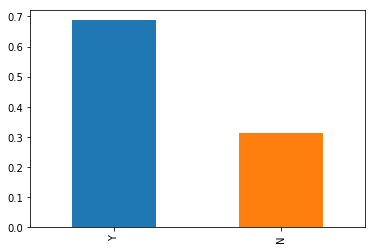

In [6]:
#about 65% have got their loan sanctioned
train['Loan_Status'].value_counts(normalize=True).plot.bar()

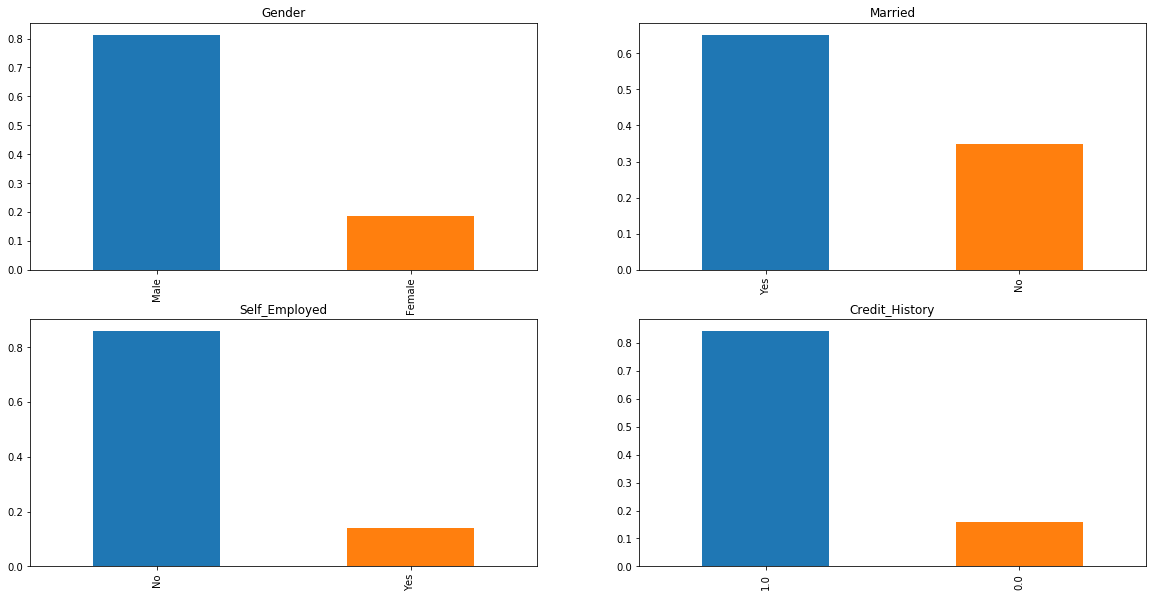

In [7]:
plt.figure(1) 
plt.subplot(221) 
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender') 


plt.subplot(222)   
train['Married'].value_counts(normalize=True).plot.bar(title= 'Married') 


plt.subplot(223) 
train['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed') 


plt.subplot(224) 
train['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History') 
plt.show()

#80percent of applicants are male
#60% are married
#80 percent are self employed
#around 80 percent have No credit history

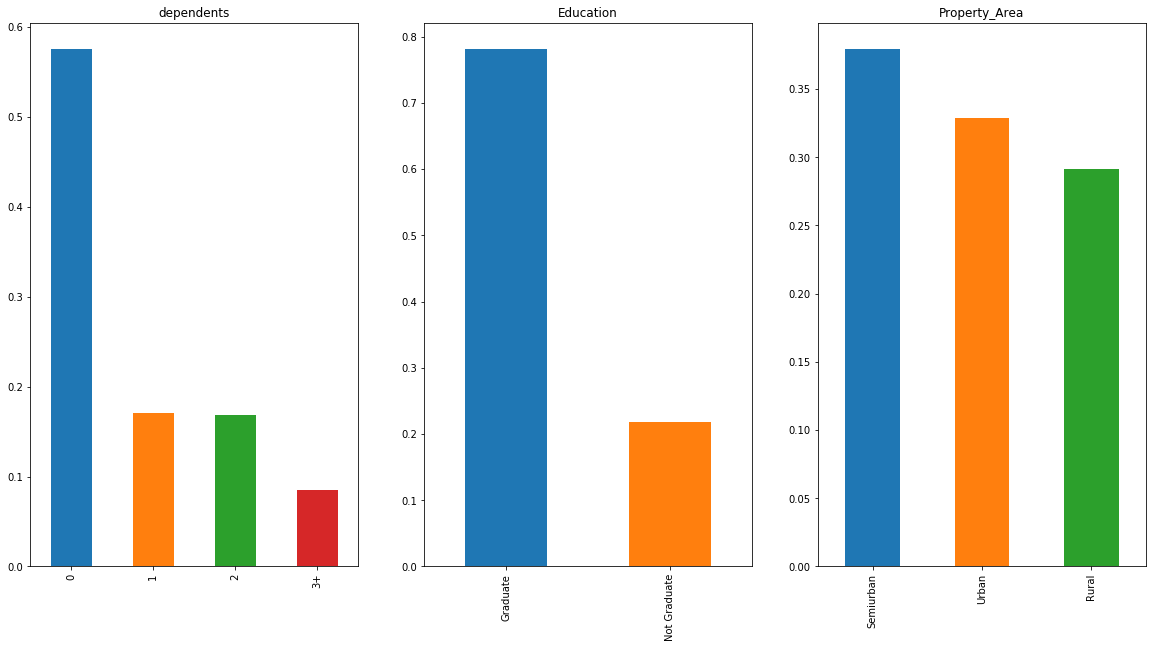

In [8]:
plt.figure(2)
plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='dependents')
plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Education')
plt.subplot(133)

train['Property_Area'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Property_Area')


#plot gives us detail about dependent family members, education qualification, their property area

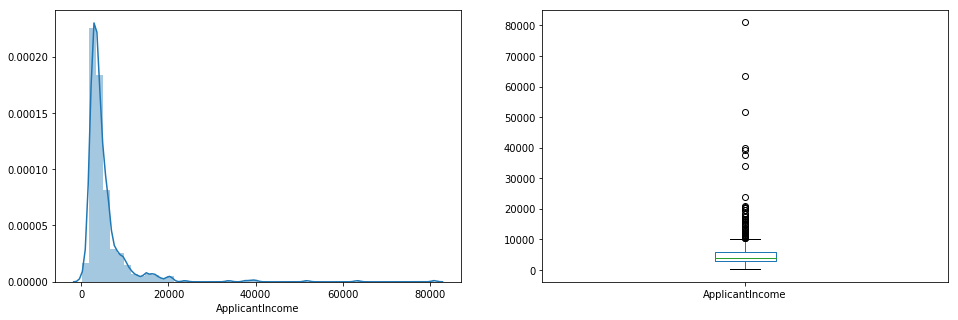

In [9]:
plt.figure(3)
plt.subplot(121)
sns.distplot(train['ApplicantIncome'])

plt.subplot(122) 
train['ApplicantIncome'].plot.box(figsize=(16,5)) 


#around many of the applicants income is near 10k per month

Text(0.5, 0.98, '')

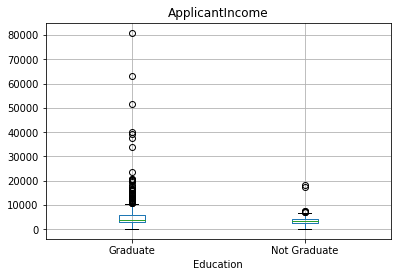

In [10]:
train.boxplot(column='ApplicantIncome', by = 'Education') 
plt.suptitle("")

#comparison of Applicant Income and their Education Qualification

Loan_Status    N    Y
Gender               
Female        37   75
Male         150  339


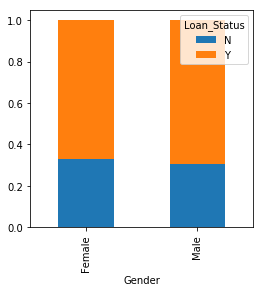

In [11]:
gender=pd.crosstab(train['Gender'],train['Loan_Status']) 
print(gender)
gender.div(gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

#comparison of Loan Status and Gender

Loan_Status     N    Y
Education             
Graduate      140  340
Not Graduate   52   82


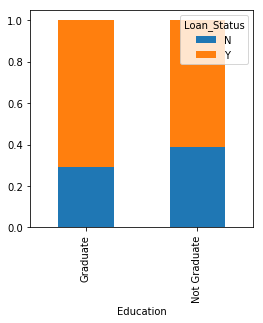

Loan_Status     N    Y
Property_Area         
Rural          69  110
Semiurban      54  179
Urban          69  133


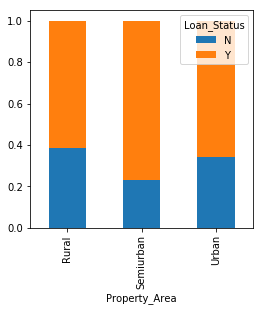

Loan_Status      N    Y
Credit_History         
0.0             82    7
1.0             97  378


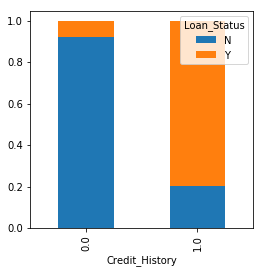

Loan_Status    N    Y
Dependents           
0            107  238
1             36   66
2             25   76
3+            18   33


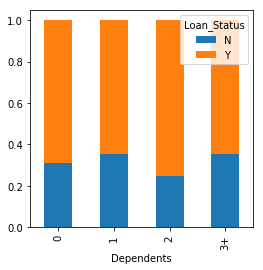

In [12]:

gender=pd.crosstab(train['Education'],train['Loan_Status']) 
print(gender)
gender.div(gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()
gender=pd.crosstab(train['Property_Area'],train['Loan_Status']) 
print(gender)
gender.div(gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()
gender=pd.crosstab(train['Credit_History'],train['Loan_Status']) 
print(gender)
gender.div(gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

gender=pd.crosstab(train['Dependents'],train['Loan_Status']) 
print(gender)
gender.div(gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()


#comparison of various features and Loan Status

# Feature Engineering


In [14]:
#total income will be considered and lets classify Loan Status based Income

train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High', 'Very high'] 
train['Total_Income_bin']=pd.cut(train['Total_Income'],bins,labels=group)

Loan_Status        N    Y
Total_Income_bin         
Low               14   10
Average           32   87
High              65  159
Very high         81  166


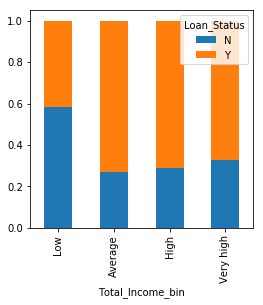

In [15]:
gender=pd.crosstab(train['Total_Income_bin'],train['Loan_Status']) 
print(gender)
gender.div(gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

Loan_Status             N    Y
loan_amount_category          
low                    47  107
average               103  255
high                   31   49


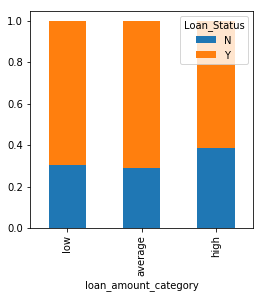

In [16]:
# lets classify Loan Status based Loan Amount


bins=[0,100,200,700]
group=["low","average","high"]
train['loan_amount_category']=pd.cut(train['LoanAmount'],bins,labels=group)
gender=pd.crosstab(train['loan_amount_category'],train['Loan_Status']) 
print(gender)
gender.div(gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

In [17]:
train=train.drop(['loan_amount_category'],axis=1)
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,Total_Income_bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,5849.0,High
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,Very high
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,Average
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,High
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,High


In [18]:
train['Dependents'].replace('3+',3,inplace=True)
train['Loan_Status'].replace('Y',1,inplace=True)
train['Loan_Status'].replace('N',0,inplace=True)

In [19]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,Total_Income_bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1,5849.0,High
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,6091.0,Very high
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,3000.0,Average
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,4941.0,High
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,6000.0,High


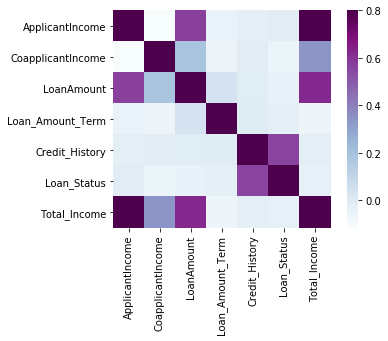

In [20]:

#on drawing the correlation matrix to find redundant features
matrix = train.corr()
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu")

In [21]:
#filling the missing values
train.isnull().sum()


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
Total_Income          0
Total_Income_bin      0
dtype: int64

In [22]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True) 
train['Married'].fillna(train['Married'].mode()[0], inplace=True) 
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True) 
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True) 
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)


In [23]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
Total_Income         0
Total_Income_bin     0
dtype: int64

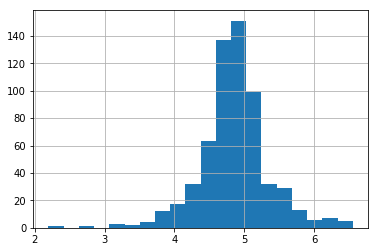

In [24]:
#be will be taking the log of Loan Amount for normalized distribution

train['LoanAmount_log'] = np.log(train['LoanAmount']) 
train['LoanAmount_log'].hist(bins=20) 
test['LoanAmount_log'] = np.log(test['LoanAmount'])

In [25]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,Total_Income_bin,LoanAmount_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1,5849.0,High,4.852030
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,6091.0,Very high,4.852030
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,3000.0,Average,4.189655
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,4941.0,High,4.787492
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,6000.0,High,4.948760


In [26]:
y = train.Loan_Status
x = train.drop(['Loan_Status','Loan_ID','LoanAmount_log','Total_Income'],1)
x=pd.get_dummies(x)

In [27]:
x.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_3,...,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Total_Income_bin_Low,Total_Income_bin_Average,Total_Income_bin_High,Total_Income_bin_Very high
0,5849,0.0,128.0,360.0,1.0,0,1,1,0,0,...,0,1,0,0,0,1,0,0,1,0
1,4583,1508.0,128.0,360.0,1.0,0,1,0,1,0,...,0,1,0,1,0,0,0,0,0,1
2,3000,0.0,66.0,360.0,1.0,0,1,0,1,0,...,0,0,1,0,0,1,0,1,0,0
3,2583,2358.0,120.0,360.0,1.0,0,1,0,1,0,...,1,1,0,0,0,1,0,0,1,0
4,6000,0.0,141.0,360.0,1.0,0,1,1,0,0,...,0,1,0,0,0,1,0,0,1,0


In [28]:
#splitting data for cross validation

from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(x,y,random_state=2,test_size =0.3)

In [29]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
model = LogisticRegression() 
model.fit(x_train, y_train)
pred_cv = model.predict(x_cv)

In [30]:
accuracy_score(y_cv,pred_cv)

0.7837837837837838

In [31]:
#N fold stratified cross validation
from sklearn.model_selection import StratifiedKFold


1 of kfold 5
accuracy_score 0.8145161290322581


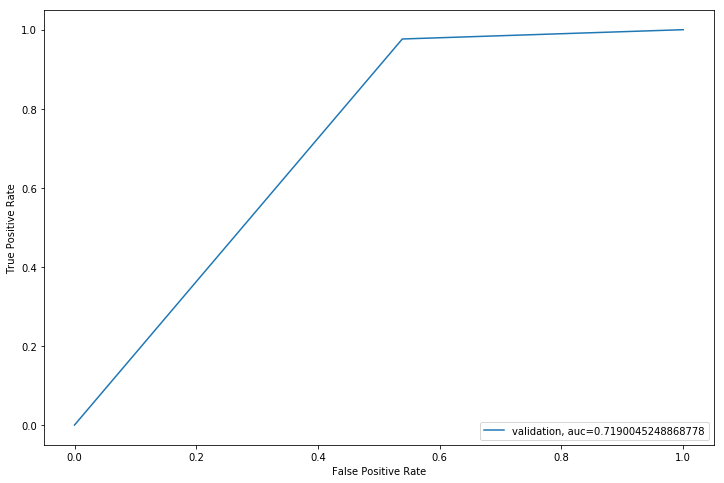


2 of kfold 5
accuracy_score 0.8306451612903226


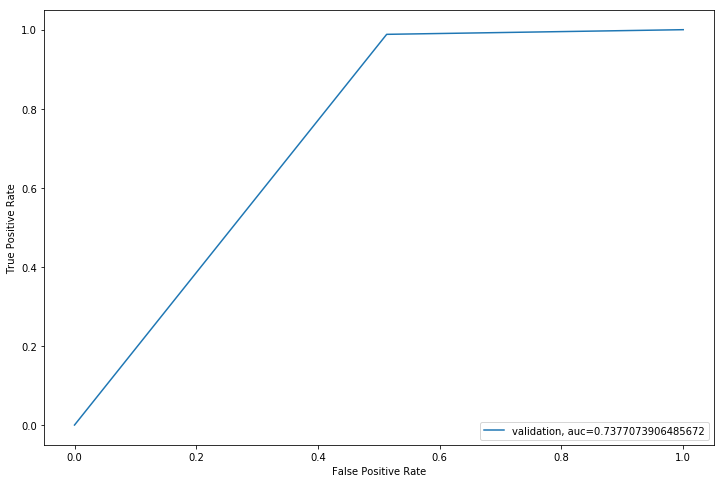


3 of kfold 5
accuracy_score 0.8114754098360656


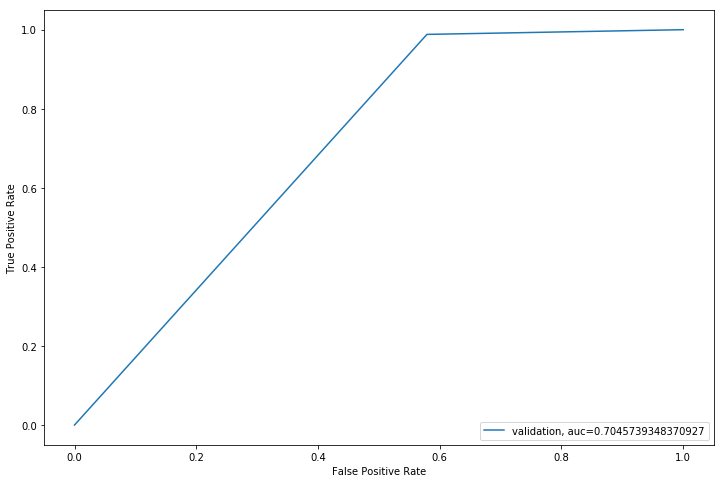


4 of kfold 5
accuracy_score 0.8032786885245902


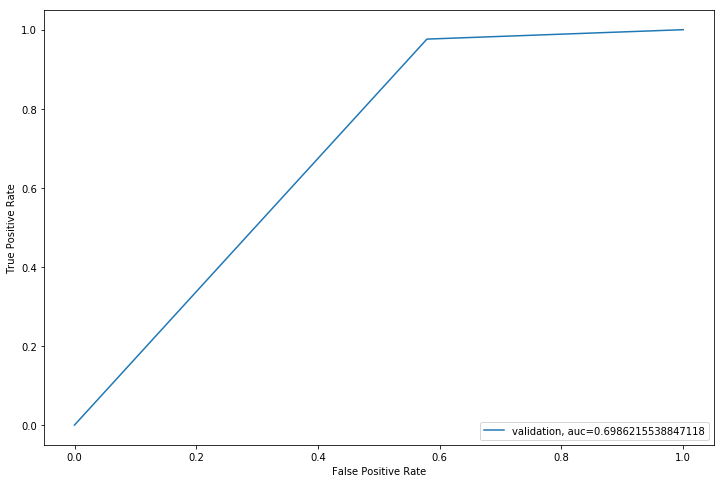


5 of kfold 5
accuracy_score 0.8278688524590164


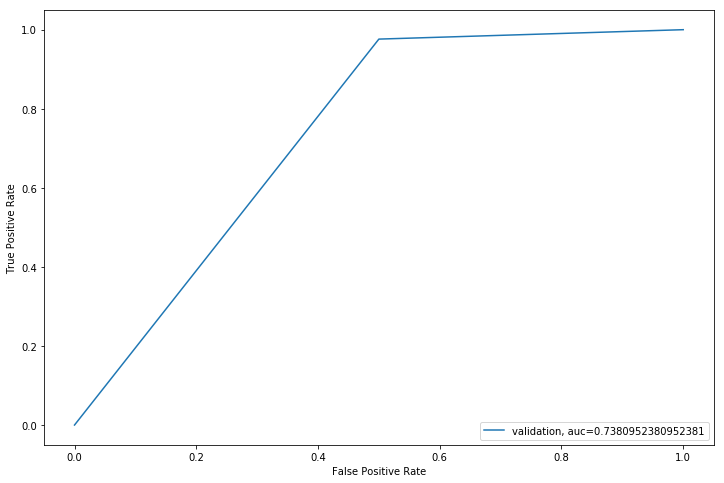

In [32]:
i=1 
scores=['']
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(x,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = x.loc[train_index],x.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = LogisticRegression(random_state=1)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)  
    scores.append(score)
    print('accuracy_score',score)     
    i+=1
    from sklearn import metrics 
    fpr, tpr, _ = metrics.roc_curve(yvl,  pred_test) 
    auc = metrics.roc_auc_score(yvl, pred_test) 
    plt.figure(figsize=(12,8)) 
    plt.plot(fpr,tpr,label="validation, auc="+str(auc)) 
    plt.xlabel('False Positive Rate') 
    plt.ylabel('True Positive Rate') 
    plt.legend(loc=4) 
    plt.show()

    
    
    
    
    



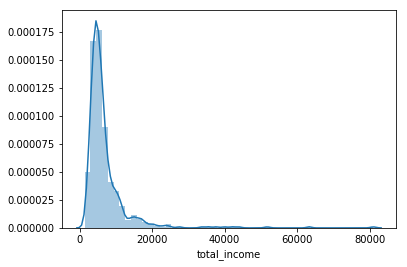

In [33]:
#taking log of total incomes

train['total_income']=train['ApplicantIncome']+train['CoapplicantIncome']
sns.distplot(train['total_income'])

In [34]:
train['log_total_income']=np.log(train['total_income'])

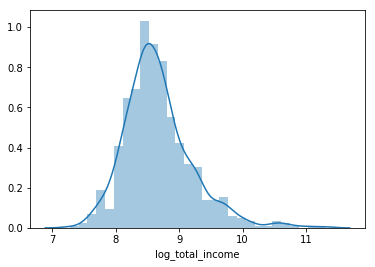

In [35]:
sns.distplot(train['log_total_income'])

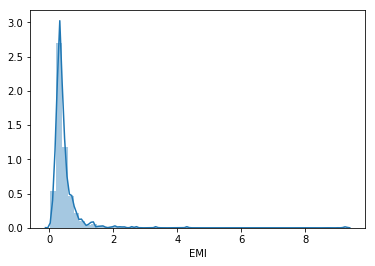

In [36]:
#training a new feature called EMI

train['EMI']=train['LoanAmount']/train['Loan_Amount_Term']
sns.distplot(train['EMI'])

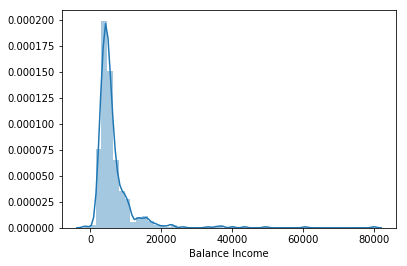

In [37]:

train['Balance Income']=train['Total_Income']-(train['EMI']*1000)
sns.distplot(train['Balance Income'])

In [38]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Total_Income,LoanAmount_log,total_income,log_total_income,EMI,Balance Income
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049,0.687296,7024.705081,4.857250,7024.705081,8.669414,0.473687,6551.017998
std,6109.041673,2926.248369,84.107233,64.428629,0.352339,0.463973,6458.663872,0.495996,6458.663872,0.545102,0.511134,6290.136695
min,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,1442.000000,2.197225,1442.000000,7.273786,0.025000,-1768.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,4166.000000,4.607658,4166.000000,8.334712,0.288889,3804.305556
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000,1.000000,5416.500000,4.852030,5416.500000,8.597205,0.361111,4979.888889
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000,1.000000,7521.750000,5.104426,7521.750000,8.925549,0.505556,6958.027778
max,81000.000000,41667.000000,700.000000,480.000000,1.000000,1.000000,81000.000000,6.551080,81000.000000,11.302204,9.250000,80000.000000


Loan_Status             0    1
Balance_Income_label          
very low                1    1
low                   165  374
average                24   44
high                    2    3


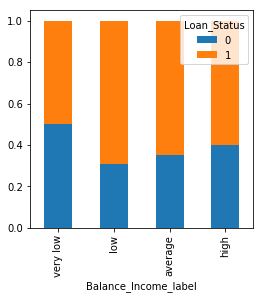

In [39]:
bins=[-1770,0,10000,40000,81000]
group=["very low","low","average","high"]
train['Balance_Income_label']=pd.cut(train['Balance Income'],bins,labels=group)
gender=pd.crosstab(train['Balance_Income_label'],train['Loan_Status']) 
print(gender)
gender.div(gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

In [40]:
train=train.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)

In [41]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,Total_Income,Total_Income_bin,LoanAmount_log,total_income,log_total_income,EMI,Balance Income,Balance_Income_label
0,LP001002,Male,No,0,Graduate,No,1.0,Urban,1,5849.0,High,4.852030,5849.0,8.674026,0.355556,5493.444444,low
1,LP001003,Male,Yes,1,Graduate,No,1.0,Rural,0,6091.0,Very high,4.852030,6091.0,8.714568,0.355556,5735.444444,low
2,LP001005,Male,Yes,0,Graduate,Yes,1.0,Urban,1,3000.0,Average,4.189655,3000.0,8.006368,0.183333,2816.666667,low
3,LP001006,Male,Yes,0,Not Graduate,No,1.0,Urban,1,4941.0,High,4.787492,4941.0,8.505323,0.333333,4607.666667,low
4,LP001008,Male,No,0,Graduate,No,1.0,Urban,1,6000.0,High,4.948760,6000.0,8.699515,0.391667,5608.333333,low


In [42]:
y = train.Loan_Status
x = train.drop(['Loan_Status','Loan_ID','Balance_Income_label'],1)
x=pd.get_dummies(x)

In [43]:
x = x.drop(['total_income','Total_Income',],1)
x.head()


,Credit_History,LoanAmount_log,log_total_income,EMI,Balance Income,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_3,...,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Total_Income_bin_Low,Total_Income_bin_Average,Total_Income_bin_High,Total_Income_bin_Very high
0,1.0,4.852030,8.674026,0.355556,5493.444444,0,1,1,0,0,...,0,1,0,0,0,1,0,0,1,0
1,1.0,4.852030,8.714568,0.355556,5735.444444,0,1,0,1,0,...,0,1,0,1,0,0,0,0,0,1
2,1.0,4.189655,8.006368,0.183333,2816.666667,0,1,0,1,0,...,0,0,1,0,0,1,0,1,0,0
3,1.0,4.787492,8.505323,0.333333,4607.666667,0,1,0,1,0,...,1,1,0,0,0,1,0,0,1,0
4,1.0,4.948760,8.699515,0.391667,5608.333333,0,1,1,0,0,...,0,1,0,0,0,1,0,0,1,0



1 of kfold 5
accuracy_score 0.8064516129032258


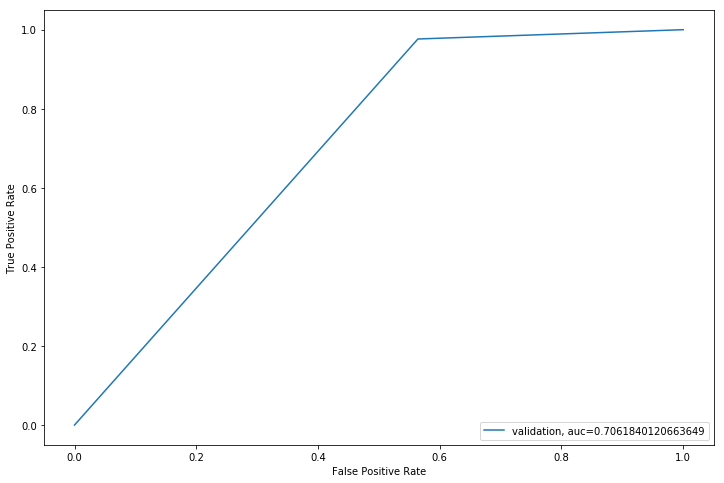


2 of kfold 5
accuracy_score 0.8306451612903226


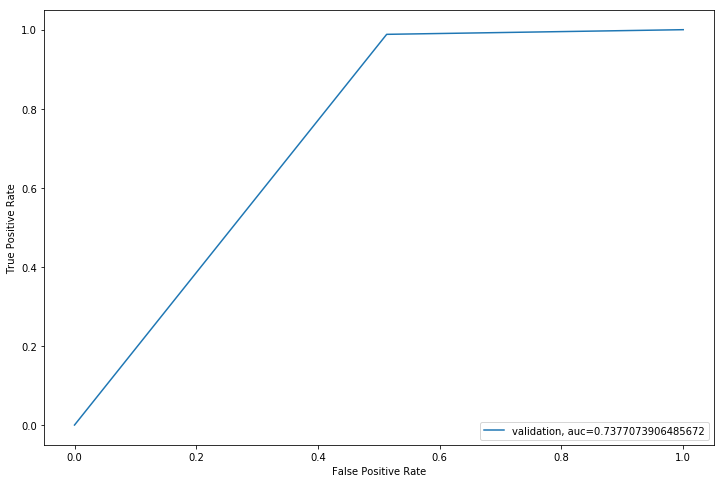


3 of kfold 5
accuracy_score 0.8032786885245902


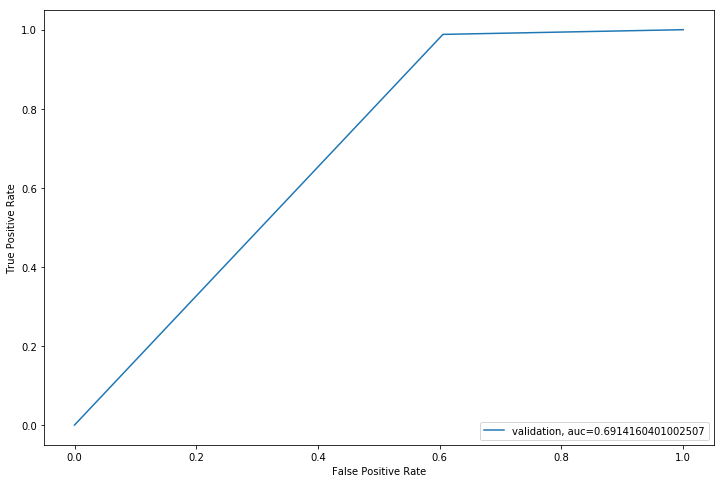


4 of kfold 5
accuracy_score 0.7786885245901639


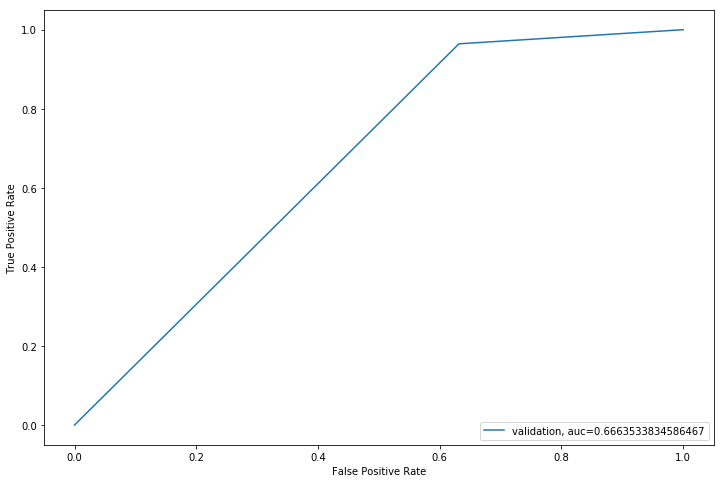


5 of kfold 5
accuracy_score 0.8278688524590164


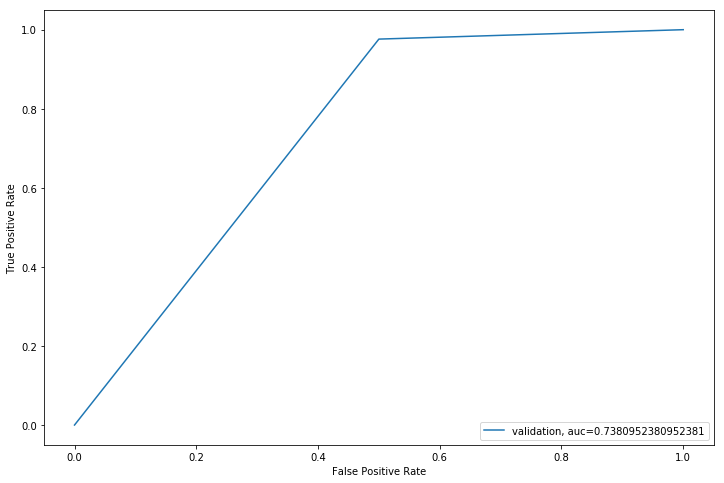

In [44]:
#logicstic regression with new features
i=1 
scores=0
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(x,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = x.loc[train_index],x.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = LogisticRegression(random_state=1)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)  
    scores=scores+score
    print('accuracy_score',score)     
    i+=1
    from sklearn import metrics 
    fpr, tpr, _ = metrics.roc_curve(yvl,  pred_test) 
    auc = metrics.roc_auc_score(yvl, pred_test) 
    plt.figure(figsize=(12,8)) 
    plt.plot(fpr,tpr,label="validation, auc="+str(auc)) 
    plt.xlabel('False Positive Rate') 
    plt.ylabel('True Positive Rate') 
    plt.legend(loc=4) 
    plt.show()

In [45]:
print(scores/5)

0.809386567953464



1 of kfold 5
accuracy_score 0.782258064516129


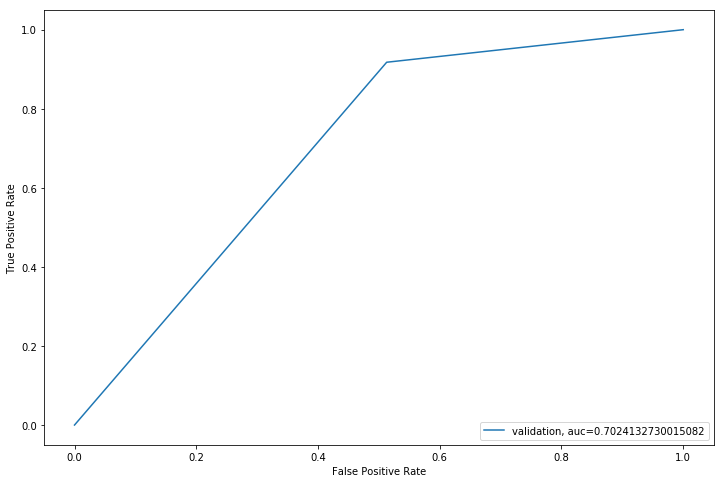


2 of kfold 5
accuracy_score 0.8225806451612904


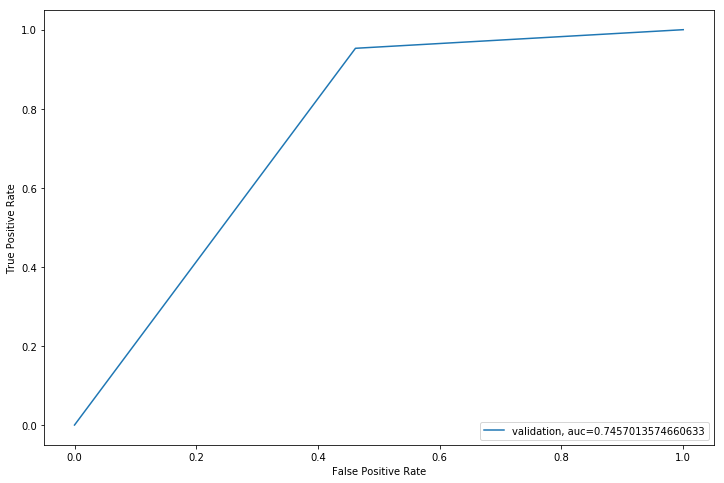


3 of kfold 5
accuracy_score 0.7540983606557377


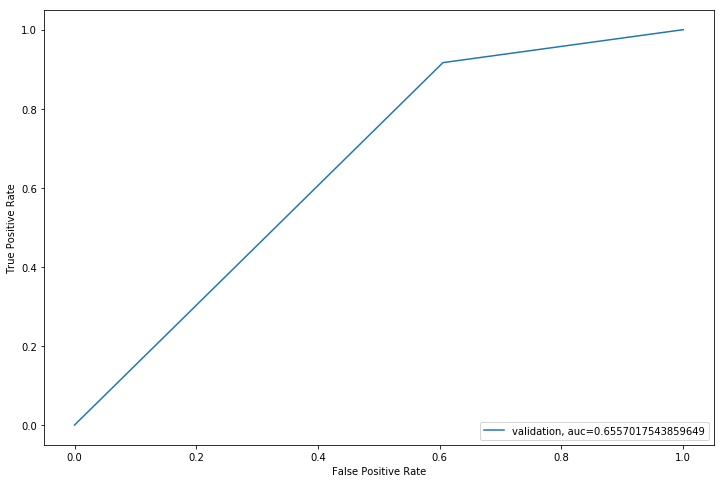


4 of kfold 5
accuracy_score 0.7704918032786885


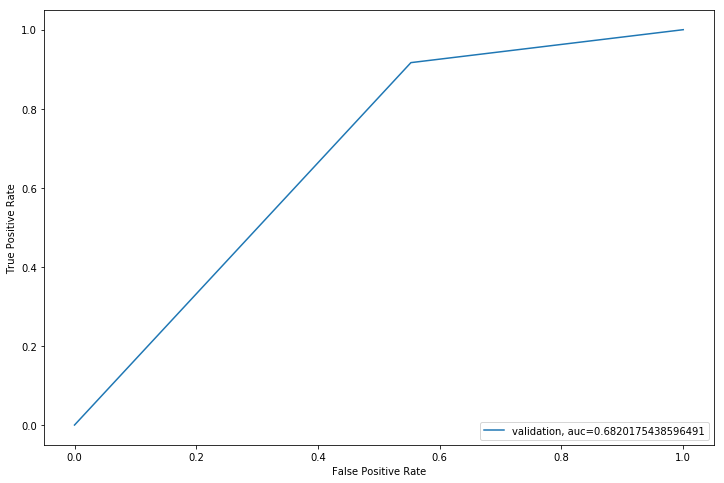


5 of kfold 5
accuracy_score 0.8032786885245902


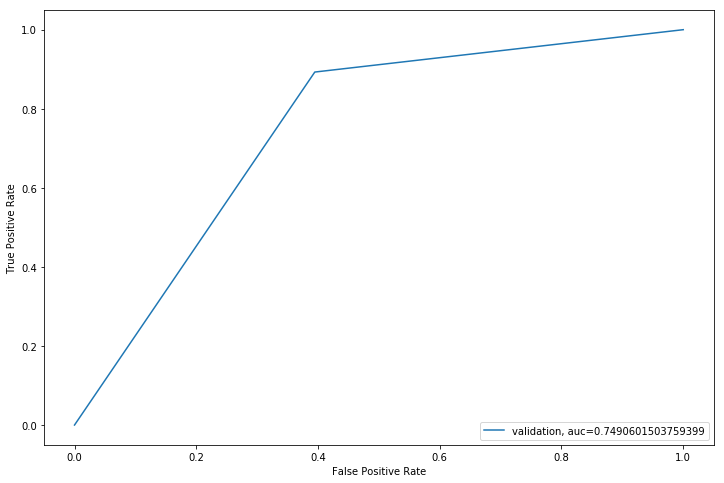

In [46]:
#random forrest classifier

from sklearn.ensemble import RandomForestClassifier

i=1 
scores=0
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(x,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = x.loc[train_index],x.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = RandomForestClassifier(random_state=1,max_depth=10)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)  
    scores=scores+score
    print('accuracy_score',score)     
    i+=1
    from sklearn import metrics 
    fpr, tpr, _ = metrics.roc_curve(yvl,  pred_test) 
    auc = metrics.roc_auc_score(yvl, pred_test) 
    plt.figure(figsize=(12,8)) 
    plt.plot(fpr,tpr,label="validation, auc="+str(auc)) 
    plt.xlabel('False Positive Rate') 
    plt.ylabel('True Positive Rate') 
    plt.legend(loc=4) 
    plt.show()

In [47]:
print(scores/5)

0.7865415124272872


In [48]:
from sklearn.model_selection import GridSearchCV
paramgrid = {'max_depth': list(range(1, 20, 2)), 'n_estimators': list(range(1, 200, 20))}
grid_search=GridSearchCV(RandomForestClassifier(random_state=1),paramgrid)
from sklearn.model_selection import train_test_split 
x_train, x_cv, y_train, y_cv = train_test_split(x,y, test_size =0.3, random_state=1)
grid_search.fit(x_train,y_train)


C:\Users\VIGNESH\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19], 'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161, 181]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [49]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=81, n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False)


1 of kfold 5
accuracy_score 0.782258064516129


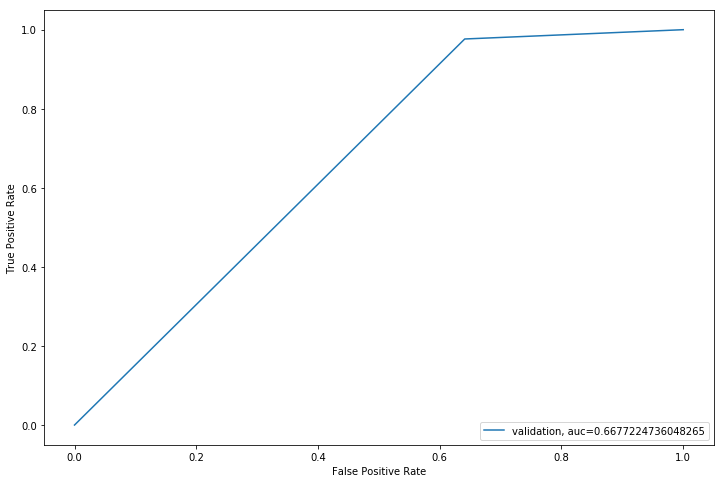


2 of kfold 5
accuracy_score 0.8306451612903226


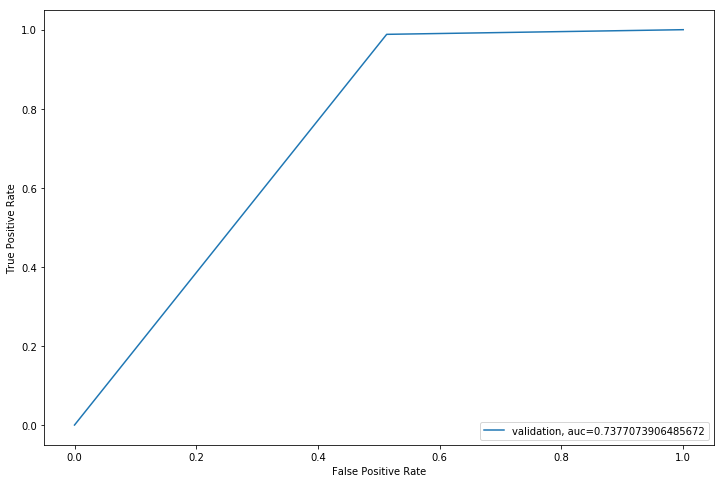


3 of kfold 5
accuracy_score 0.7704918032786885


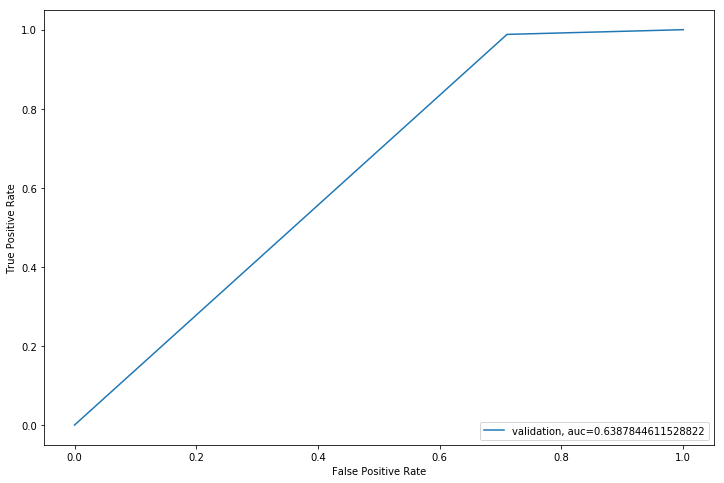


4 of kfold 5
accuracy_score 0.7459016393442623


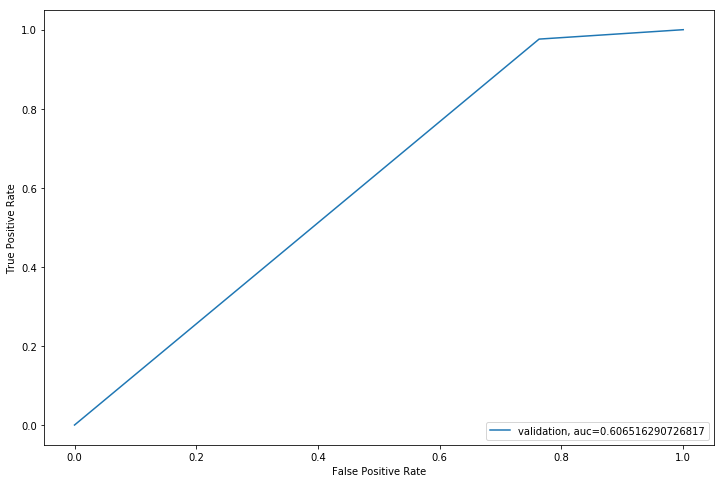


5 of kfold 5
accuracy_score 0.7950819672131147


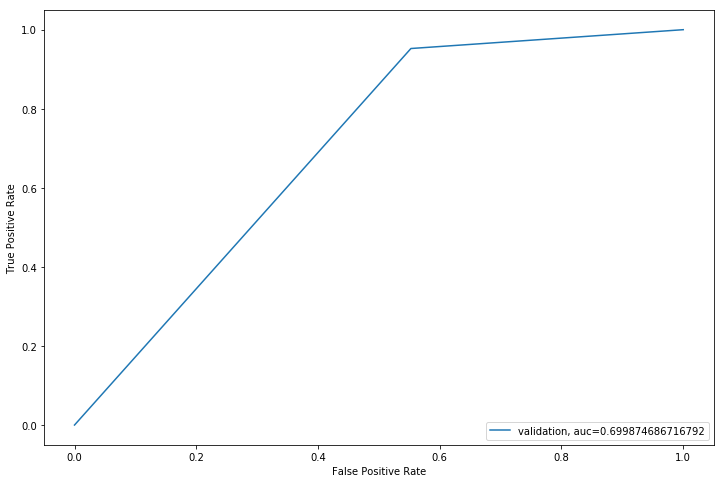

In [50]:
i=1 
scores=0
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(x,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = x.loc[train_index],x.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = RandomForestClassifier(random_state=1,max_depth=3, n_estimators=141)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)  
    scores=scores+score
    print('accuracy_score',score)     
    i+=1
    from sklearn import metrics 
    fpr, tpr, _ = metrics.roc_curve(yvl,  pred_test) 
    auc = metrics.roc_auc_score(yvl, pred_test) 
    plt.figure(figsize=(12,8)) 
    plt.plot(fpr,tpr,label="validation, auc="+str(auc)) 
    plt.xlabel('False Positive Rate') 
    plt.ylabel('True Positive Rate') 
    plt.legend(loc=4) 
    plt.show()

In [51]:
print(scores/5)

0.7848757271285034


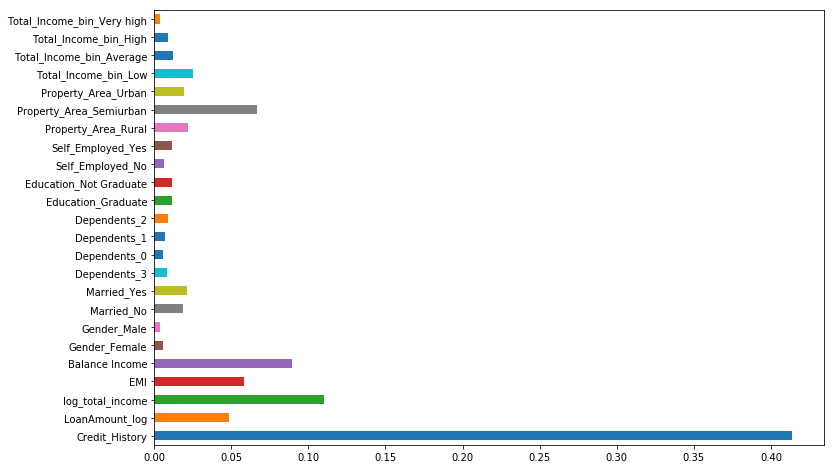

In [52]:
importances=pd.Series(model.feature_importances_, index=x.columns) 
importances.plot(kind='barh', figsize=(12,8))


In [ ]:
#final accuracy on cross validation

In [55]:
print(scores/5)

0.7881544156530935
